In [1]:
import mmf_setup;mmf_setup.nbinit()

<IPython.core.display.Javascript object>

# The Unitary Fermi Gas

Here we summarize some features of the unitary Fermi gas (UFG) in harmonic traps.

<!-- TEASER_END -->

We start with the properties of a free Fermi gas with two components (spin states):

\begin{gather}
   n_+ = n = 2\int_0^{k_F} 1 \frac{\d^3 k}{(2\pi)^3} = \frac{k_F^3}{3\pi^2}
       = \frac{k_F^3}{3\pi^2}
       = \frac{(2m\mu)^{3/2}}{3\pi^2\hbar^3}
     \tag{density}\\
   \mu = E_F = \epsilon_F = \frac{\hbar^2k_F^2}{2m} = \frac{\hbar^2(3\pi^2 n)^{2/3}}{2m}
     \tag{chemical potential/Fermi energy}\\
   \mathcal{E} = 2\int_0^{k_F} \frac{\hbar^2k^2}{2m} \frac{\d^3 k}{(2\pi)^3}
               = \frac{\hbar^2 k_F^5}{10m\pi^2} = \mu \frac{k_F^3}{5\pi^2} 
               = \frac{3}{5}n \mu \tag{energy density}\\
   E_{FG} = \frac{\mathcal{E}}{n} = \frac{3}{5}E_F  \tag{energy per particle}.
\end{gather}

The energy density for the UFG is expressed in terms of these and the Bertsch parameter $\xi = 0.370(5)$:

$$
  \mathcal{E}_{TF}[n] = \xi \mathcal{E}_{FG}[n] = \xi\frac{\hbar^2}{m}\frac{3(3\pi^2)^{2/3}}{10}n^{5/3}, \qquad
  \mu_{UFG} = \xi \epsilon_F.
$$

## Harmonic Traps

Here we derive the results for a harmonically trapped gas in a spherical trap using the local density approximation (LDA) or Thomas-Fermi (TF) approximation:

\begin{gather}
   V(r) = \frac{m\omega^2 r^2}{2}, \tag{HO traping potential}\\
   a^2 = \frac{\hbar}{m\omega}, \tag{HO length}\\
   R_{TF}^2 = \frac{2\mu}{m\omega^2} = a^2 \frac{2\mu}{\hbar\omega}, 
     \tag{Thomas-Fermi or cloud radius}\\
   \xi \epsilon_F[n] = \mu - V(r) = \frac{m\omega^2(R_{TF}^2 - r^2)}{2}, 
     \tag{local chemical potential}\\
   n(r) = \frac{m^3\omega^3}{3\pi^2\hbar^3 \xi^{3/2}}\left(R_{TF}^2 - r^2\right)^{3/2}
        = \frac{(R_{TF}^2 - r^2)^{3/2}}{3\pi^2 a^6 \xi^{3/2}}
     \tag{density}\\
   N = \int_0^{R_{TF}} n(r) 4\pi r^2\d{r}
     = \frac{4}{3\pi a^6 \xi^{3/2}} \int_0^{R_{TF}}r^2( R_{TF}^2 - r^2)^{3/2}\d{r}
     = \frac{R_{TF}^6}{24 a^6 \xi^{3/2}} 
     = \frac{m^3\omega^3 R_{TF}^6}{24 \hbar^3 \xi^{3/2}} 
     \tag{paticle number}\\
   E = \int_0^{R_{TF}} \left(\mathcal{E}_{TF}[n(r)] + \frac{m\omega^2}{2}n(r)\right) 4\pi r^2\d{r} 
     = \frac{\hbar^2 R_{TF}^8}{ 64 m a^{10} \xi^{3/2}}
     = \frac{m^4 \omega^5}{64 \hbar^3 \xi^{3/2}R_{TF}^8}
     \tag{energy}\\
   E(N) = \hbar\omega\sqrt{\xi}\frac{(3N)^{4/3}}{4}.
\end{gather}

In [126]:
import sympy; sympy.init_session(quiet=True)
h, xi, m, w, r, R, n, mu, R2_r2 = var('hbar, xi, m, omega, r, R, n, mu, R^{2}-r^{2}', positive=True)
pi = sympy.pi
k_ = (3*pi**2*n)**(S(1)/3)
mu_TF = xi*h**2*k_**2/2/m
E_TF = S(3)/5*mu_*n
V = m*w**2*R2_r2/2
n_HO = solve(mu_-V, n)[0]
E_HO = (E_ + m*w**2*r**2/2*n_HO).subs(n,n_HO).simplify().subs(R2_r2, R**2-r**2).simplify()
n_HO = n_HO.subs(R2_r2, R**2-r**2)
#N = (n_HO*4*pi*r**2).integrate((r, (0, R)))
#E = (E_HO*4*pi*r**2).integrate((r, (0, R)))
N = R**6*m**3*w**3/24/h**3/xi**(S(3)/2)
E = R**8*m**4*w**5/64/h**3/xi**(S(3)/2)
l, N_ = symbols('l, N', positive=True)
N = R**6*m**3*w**3/24/h**3/xi**(S(3)/2)
E = R**8*m**4*w**5/64/h**3/xi**(S(3)/2)
E.subs(R, solve(N-N_, R)[0])

IPython console for SymPy 1.0 (Python 2.7.13-64-bit) (ground types: python)


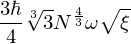

In [127]:
l, N_ = symbols('l, N', positive=True)
N = R**6*m**3*w**3/24/h**3/xi**(S(3)/2)
E = R**8*m**4*w**5/64/h**3/xi**(S(3)/2)
E.subs(R, solve(N-N_, R)[0])

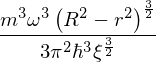

In [128]:
n_HO

# GPE Bose Gas

For comparison, here we summarize some features of a trapped Bose gas:

Here we derive the results for a harmonically trapped gas in a spherical trap using the local density approximation (LDA) or Thomas-Fermi (TF) approximation:

\begin{gather}
   V(r) = \frac{m\omega^2 r^2}{2}, \tag{HO traping potential}\\
   a^2 = \frac{\hbar}{m\omega}, \tag{HO length}\\
   R_{TF}^2 = \frac{2\mu}{m\omega^2} = a^2 \frac{2m\mu}{\hbar\omega}, 
     \tag{Thomas-Fermi or cloud radius}\\
   \mu_e(r) = \mu - V(r) = \frac{m\omega^2(R_{TF}^2 - r^2)}{2}, 
     \tag{local chemical potential}\\
   n(r) = \frac{m\omega^2(R_{TF}^2 - r^2)}{2g}
     \tag{density}\\
   N = \int n(r) \d^3{x} = \frac{4 m \omega^2 R^5 \pi}{15 g} 
     = \frac{16\pi}{15 g\omega^3}\sqrt{\frac{2\mu^5}{m^3}}
   \tag{particle number}
\end{gather}

To generalize this to 3D with different trapping frequencies note that the TF radius in each direction $R_i \propto 1/\omega_i$ so we introduce dimensionless coordinates $\tilde{x}_i = x_i/R_i$: 

$$
  \mu = \frac{m\omega_i^2R_i^2}{2}, \qquad
  \frac{m\omega_i^2}{2} = \frac{\mu}{R_i^2}, \qquad
  R_i = \sqrt{\frac{2\mu}{m}}\frac{1}{\omega_i},\\
  n = \frac{\mu - m\sum_i \omega_i^2x_i^2/2}{g}
    = \mu\frac{1 - \tilde{r}^2}{g},\\
  N = R_xR_yR_z \int n(\tilde{r})\d^3{\tilde{x}} =
      \frac{1}{\omega_x\omega_y\omega_z}\sqrt{\frac{2\mu}{m}}^3\frac{8\pi \mu}{15 g} = 
      \frac{16\pi}{15 g \omega_x\omega_y\omega_z}\sqrt{\frac{2\mu^5}{m^3}}
$$

We can obtain effective 2D and 1D densities which would be obtained by integrating along the line-of-sight (along the $z$ axis here) or in the $y-z$ plane.  For reference, we fix the chemical potential by fixing $R_x$, the Thomas-Fermi radius along the $x$ axis $\mu = m\omega_x^2R_x^2/2$:

$$
  n_{2D}(x, y) = \frac{2m\left(\omega_x^2(R_x^2 - x^2) - \omega_y^2y^2\right)^{3/2}}{3\omega_z g}\\
  n_{1D}(x) = \frac{m\pi \omega_x^4}{4g\omega_y\omega_z}(R_x^2-x^2)^2
$$

## NPSEQ

Here we consider the NPSEQ, which provides a model for the integrated 1D density:
$$
  \mathcal{E} =
    \frac{\hbar^2\abs{\nabla_z\psi}^2}{2m}
    +
    \Biggl(
    \overbrace{
    \frac{\hbar^2\sigma^2_{,z}(z, t)}{2m\sigma^2}
    }^{\text{neglected}}
    + \frac{\hbar^2}{2m\sigma^2}
    + \frac{m\omega_\perp^2\sigma^2}{2}
    + \frac{g\abs{\psi}^2}{4\pi\sigma^2}
    \Biggr)\psi^\dagger\psi,\\
  \I\hbar \dot{\psi} =
  \left(
    \frac{-\hbar^2\nabla_z^2}{2m}
    + \frac{\hbar^2}{2m\sigma^2}
    + \frac{m\omega_\perp^2\sigma^2}{2}
    + \frac{g\abs{\psi}^2}{2\pi\sigma^2}
    \right)\psi,\qquad
  \frac{m\omega_\perp^2}{2}\sigma^4 = \frac{g\abs{\psi}^2}{4\pi}+\frac{\hbar^2}{2m}.
$$

$$
  \abs{\psi(z)}^2 = \int\d{x}\d{y}n(x, y, z) 
  = \frac{\mu R_xR_y}{g} \int (1-\tilde{r}_\perp^2-\tilde{z}^2)2\pi\tilde{r}_\perp \d{\tilde{r}_\perp^2}
  = \frac{\pi \mu R_xR_y (1-\tilde{z}^2)}{2 g}
  = \frac{\pi \mu (1-\tilde{z}^2)}{m\omega_x\omega_y g}
$$

The Thomas-Fermi approximation gives

$$
  \frac{\omega_x^4(R_x^2 - x^2)^2}{4\omega_\perp^2}\left(\frac{\hbar^2}{m^2} + \frac{gn(x)}{2\pi m}\right)
  =
  \left(\frac{\hbar^2}{m^2} + \frac{3gn(x)}{4\pi m}\right)^2.
$$

To compare with $n_{1D}(x)$ above, we can write this as:

$$
  \frac{gn_{1D}(x)}{m\pi}\left(\frac{\hbar^2}{m^2} + \frac{gn(x)}{2\pi m}\right)
  =
  \left(\frac{\hbar^2}{m^2} + \frac{3gn(x)}{4\pi m}\right)^2,
$$
<!--
$$
  \\
  \frac{16\pi m}{9}n_{1D}(x)\left(\frac{\hbar^2}{gm^2} + \frac{n(x)}{2\pi m}\right)
  =
  \left(\frac{4\pi\hbar^2}{3gm} + n(x)\right)^2,
  \\
  n^2(x)
  +
  \frac{8}{9}
  \left(
    \frac{3\hbar^2 \pi}{mg}
    -
    n_{1D}(x)
  \right)
  n(x)
  + 
  \frac{16\pi\hbar^2}{9mg}
  \left(
    \frac{\hbar^2 \pi}{mg}
    -
    n_{1D}(x)
  \right)
  =0
$$-->

$$
  \frac{9}{4}n(x) =
  \left(
    n_{1D}(x)
    -
    \frac{3\hbar^2 \pi}{mg}
  \right)
  +
  \sqrt{
    n_{1D}(x)\left(
      n_{1D}(x)
      +
      \frac{3\pi\hbar^2}{mg}
    \right)
  }
$$

Note that the Thomas-Fermi radius is also shifted in this approximation because the transverse modes change the chemical potential by the transverse zero-point energy $\hbar \omega_\perp$:

$$
  n(R) = 0, \qquad
  \frac{m\omega_x^2}{2} R^2 = \frac{m\omega_x^2}{2} R_x^2 - \omega_\perp\hbar.
$$